# L03 - Feature Engineering

## Author - Rodolfo Lerma

# Problem

Is it possible to identiy customer groupings based on customer transaction data?

# Abstract:

A superstore wants to identify customer groupings that visit their stores based on customer transaction (sales) data. These groupings are used for targeted promotions. You are asked to perform customer segmentation on the provided data.

The analysis is is divided the following way:

### Data exploration.
- **Exploration of the numerical variables**
- **Exploration of some categorical variables**

### Recency, Frequency, and Monetary (RFM).
- **Convert Timestamp to Datetime Object**
- **Calculate RFM Features for Users at Each Checkpoint**

### Analysis.
- **Normalizing Variables from RFM**
- **Choosing K (Number of Clusters)**
- **KMeans**
- **Results exploration**

### Summary/conclusions.

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Data exploration

In [2]:
#Load File
filename = 'SuperstoreTransaction.csv'
store = pd.read_csv(filename)

In [3]:
store.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [4]:
#Check the shape of the data array
store.shape

(9994, 21)

**Summary:**
- The data set contains 9,994 rows
- The data set has 21 Variables (columns)
- 15 variables are categorical (objects), and the rest variables are either int64 or float64.

In [5]:
store.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
store = store.dropna()
store.shape

(9994, 21)

As it is possible to see from the previous code, there are no missing values in the data set.

## Exploration of the numerical variables

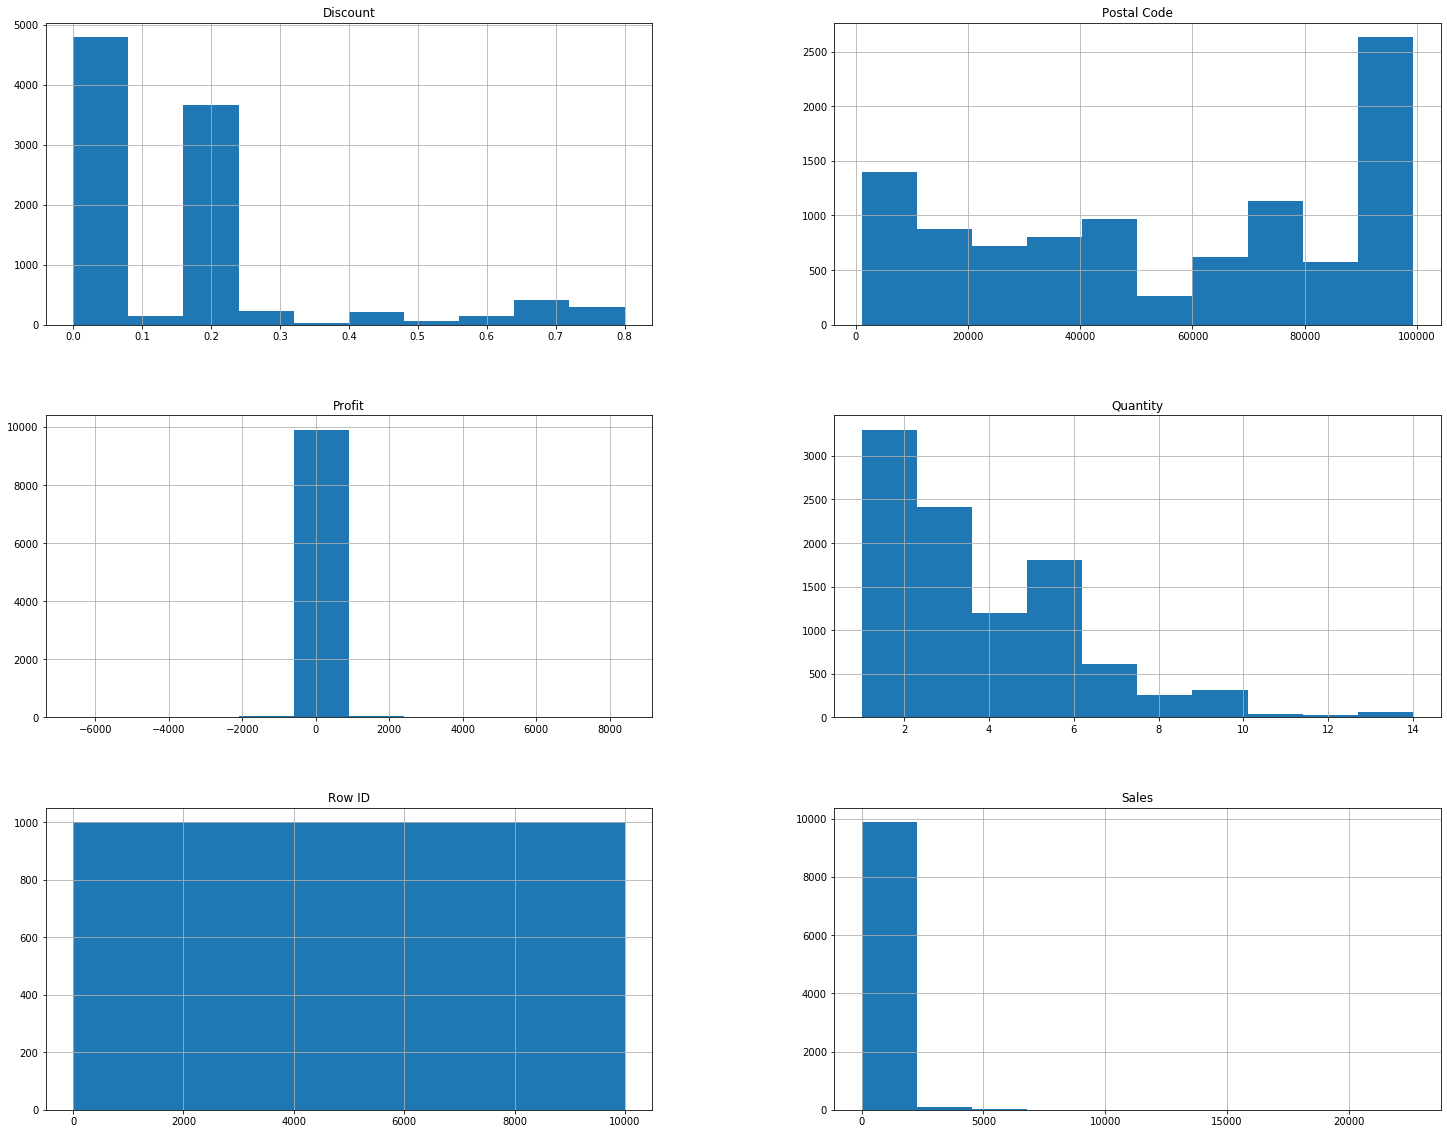

In [8]:
store.hist(figsize = (25,20))
plt.show()

## Exploration of some of the categorical variables

In [9]:
categorical_complete = ['Category','Region','Country','Segment','Sub-Category','City','State','Postal Code','Product Name','Product ID','Customer ID','Customer Name','Order ID']
unique_values = []
for i in categorical_complete:
    counts = store[i].nunique()
    unique_values.append(counts)
res = {categorical_complete[i]: unique_values[i] for i in range(len(categorical_complete))} 
print(res)

{'Category': 3, 'Region': 4, 'Country': 1, 'Segment': 3, 'Sub-Category': 17, 'City': 531, 'State': 49, 'Postal Code': 631, 'Product Name': 1850, 'Product ID': 1862, 'Customer ID': 793, 'Customer Name': 793, 'Order ID': 5009}


From the dictionary above it is possible to see that some of the categorical variables cannot be one-hot encoded since that would increase the size of the data set substantially, plus that would be a problem later on for the ML model.

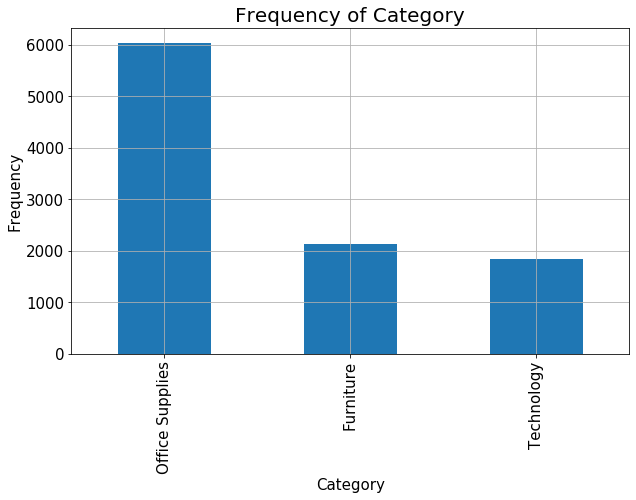

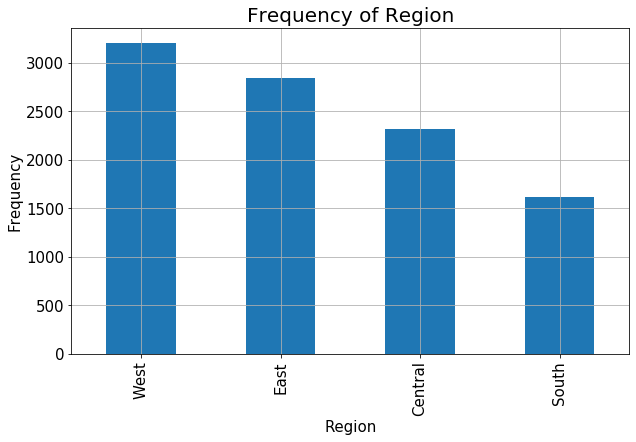

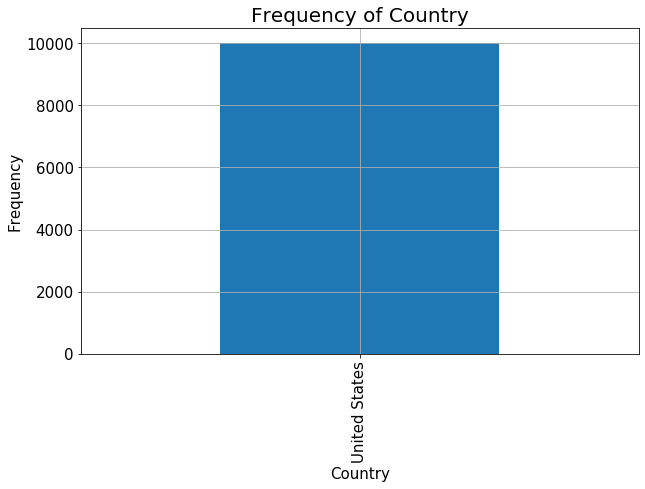

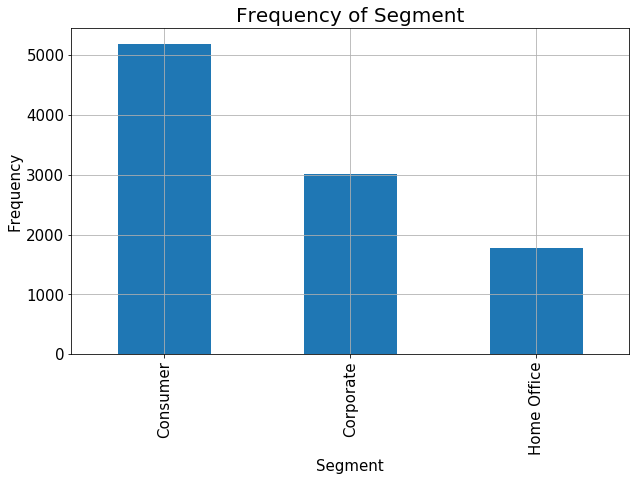

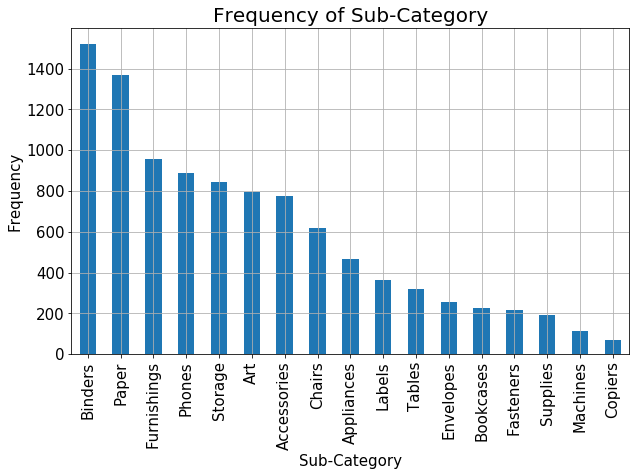

In [10]:
categorical = ['Category','Region','Country','Segment','Sub-Category']
for i in categorical:
    store.loc[:,i].value_counts().plot(kind='bar',figsize = (10,6))
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.title('Frequency of ' + i, fontsize = 20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    plt.grid(True)
    plt.show()

# Data Preparation

## One-Hot Encoding

This is not going to be used in this particular model, but just the idea will be explored as later might be used.

In [11]:
#Just for practice 2 methods of One-hot encoding will be explored
#Method 1
store1 = pd.get_dummies(store, columns=['Category','Region','Segment','Sub-Category'], \
                             prefix=['Category','Region','Segment','Sub-Category'])
store1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,...,0,0,0,0,0,0,0,0,0,0
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,...,0,0,0,0,0,0,0,0,0,0
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,United States,Los Angeles,California,...,0,0,0,1,0,0,0,0,0,0
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,...,0,0,0,0,0,0,0,0,0,1
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,...,0,0,0,0,0,0,0,1,0,0


In [12]:
#Hot encoding protocol type to include the variable in the ML model
#Method 2
for i in categorical:
    for j in store[i].unique():
        store.loc[:,j] = (store.loc[:,i] == j).astype(int)

columns = ['Category','Region','Segment','Sub-Category']

first_list = []
for i in columns:
    x = store[i].unique()
    y = x.tolist()
    first_list.append(y)
    
one_hot = []    
for sublist in first_list:
    for item in sublist:
        one_hot.append(item)

# Recency, Frequency, and Monetary (RFM)

## Convert Timestamp to Datetime Object

In [16]:
import datetime as dt
from collections import OrderedDict

store["Order Date"] = pd.to_datetime(store["Order Date"], format='%m/%d/%Y')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Phones,Binders,Appliances,Paper,Accessories,Envelopes,Fasteners,Supplies,Machines,Copiers
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0,0,0,0,0,0,0,0,0,0
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0,0,0,0,0,0,0,0,0,0
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0,0,0,0,0,0,0,0,0,0
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0,0,0,0,0,0,0,0,0,0


In [17]:
l

Minimal Date=2014-01-03, Maximal Date=2017-12-30


## Calculate RFM Features for Users at Each Checkpoint

In [18]:
Start_Date_Obj = dt.datetime.strptime("2/1/2014", "%m/%d/%Y")
End_Date_Obj = dt.datetime.strptime("11/1/2017", "%m/%d/%Y")
Time_Window = 60 #days. Only consider customers who have activities within the recent 60 days
FM_Window = 7 #days for frequency and monetary

check_point_date = Start_Date_Obj
UserID = []
Checkpoint = []
Recency = []
Frequency = []
Monetary_Value = []
Monetary_Quantity = []
while check_point_date <= End_Date_Obj:
    window_start = check_point_date - dt.timedelta(days = Time_Window)
    mask = (store["Order Date"] >= window_start) & (store["Order Date"] < check_point_date)
    # Get the data in [checkpoint-60days, checkpoint]
    data_checkpoint = store.loc[mask]
    # Get the ids of users who have activities in [checkpoint-60days, checkpoint]
    unique_users = list(set(data_checkpoint["Customer ID"]))
    #print("There are %d unique users."%(len(unique_users)))
    FM_Window_Start = check_point_date - dt.timedelta(days = FM_Window)
    for user in unique_users:
        UserID.append(user)
        Checkpoint.append(check_point_date)
        mask = data_checkpoint["Customer ID"] == user
        data_checkpoint_user = data_checkpoint.loc[mask]
        delta = check_point_date - max(data_checkpoint_user["Order Date"])
        recency = delta.days #Recency, days between checkpoint and last transaction time
        mask = data_checkpoint_user["Order Date"] >= FM_Window_Start
        data_checkpoint_user_fm = data_checkpoint_user.loc[mask]
        frequency = data_checkpoint_user_fm.shape[0]
        value = np.sum(data_checkpoint_user_fm.iloc[:, 17]) #monetary values
        quantity = np.sum(data_checkpoint_user_fm.iloc[:, 18])#monetary quantity
        Recency.append(recency)
        Frequency.append(frequency)
        Monetary_Value.append(value)
        Monetary_Quantity.append(quantity)
    check_point_date = check_point_date + dt.timedelta(days = 1)

In [19]:
# Consolidate all columns into a signle data frame
RFM_Dict = OrderedDict([ ('UserID', UserID),
          ('Checkpoint', Checkpoint),
          ('Recency',  Recency),
          ('Frequency', Frequency),
          ('Value', Monetary_Value),
          ('Quantity', Monetary_Quantity)] )
RFM_Frame = pd.DataFrame.from_dict(RFM_Dict)

In [20]:
RFM_Frame.head(10)

,UserID,Checkpoint,Recency,Frequency,Value,Quantity
0,LS-17230,2014-02-01,26,0,0.000,0
1,EH-13990,2014-02-01,17,0,0.000,0
2,HL-15040,2014-02-01,12,0,0.000,0
3,JC-15340,2014-02-01,4,1,3.928,1
4,CA-11965,2014-02-01,6,2,152.640,4
5,DP-13000,2014-02-01,29,0,0.000,0
6,SG-20605,2014-02-01,9,0,0.000,0
7,LC-17050,2014-02-01,1,1,290.666,2
8,AJ-10780,2014-02-01,22,0,0.000,0
9,BS-11590,2014-02-01,18,0,0.000,0


In [21]:
RFM = RFM_Frame.copy()

# Analysis

## Normalizing Variables from RFM

In [22]:
#Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [23]:
variables = ['Recency','Frequency','Value','Quantity']

In [24]:
# Import library
from sklearn.preprocessing import StandardScaler# Initialize the Object
scaler = StandardScaler()# Fit and Transform The Data

In [25]:
scaler.fit(RFM[variables])
RFM_norm = scaler.transform(RFM[variables])

In [26]:
df = pd.DataFrame(RFM_norm, columns = ['Recency_Norm','Frequency_Norm','Value_Norm','Quantity_Norm'])

In [27]:
final_df = pd.concat([RFM,df], axis = 1)

In [28]:
columns_norm = ['Recency_Norm','Frequency_Norm','Value_Norm']

## Choosing K (Number of Clusters)

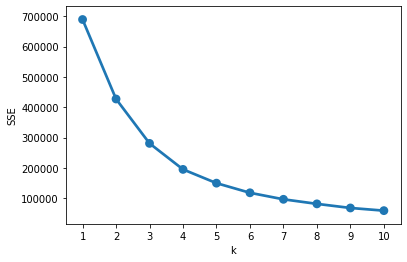

In [29]:
from sklearn.cluster import KMeans
import seaborn as sns
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df[columns_norm])
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroidplt.title('The Elbow Method')

plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

From the plot above it decided to choose a K=4 since from that moment forward it seems the decrement in SSE goes to linear and not much benefit is obtained by increasing the complexiting.

## KMeans

In [46]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(final_df[columns_norm])
model.labels_.shape

(229855,)

In [47]:
final_df["Cluster"] = model.labels_

In [48]:
final_df.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Value':'mean'}).round(2)

,Recency,Frequency,Value
Cluster,,,
0,17.32,0.13,13.70
1,3.96,4.17,4320.04
2,45.60,0.00,0.00
3,3.96,2.83,552.03


In [49]:
# Melt The Data
df_nor_melt = pd.melt(final_df.reset_index(),
                      id_vars=['UserID', 'Cluster'],
                      value_vars=['Recency_Norm','Frequency_Norm','Value_Norm'],
                      var_name='Attribute',
                      value_name='Value')
#df_nor_melt.head()# Visualize it

## Results exploration

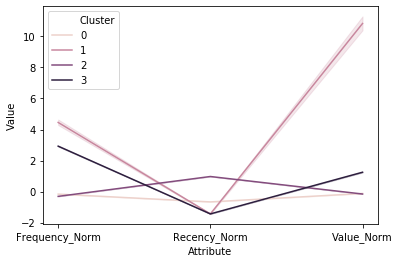

In [50]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

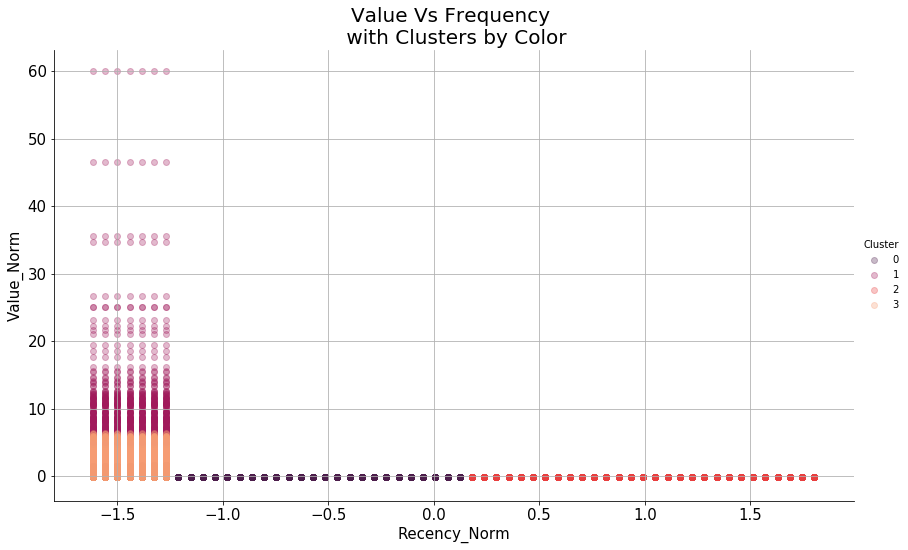

In [51]:
sns.lmplot(x = 'Recency_Norm', y = 'Value_Norm', 
           data = final_df, 
           hue = "Cluster", 
           palette="rocket", 
           scatter_kws={'alpha':0.3},
           height=7, aspect=1.7, #This line controls the size of the plot
           fit_reg = False)

plt.xlabel('Recency_Norm', fontsize = 15)
plt.ylabel('Value_Norm', fontsize = 15)
plt.title('Value Vs Recency \n with Clusters by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)

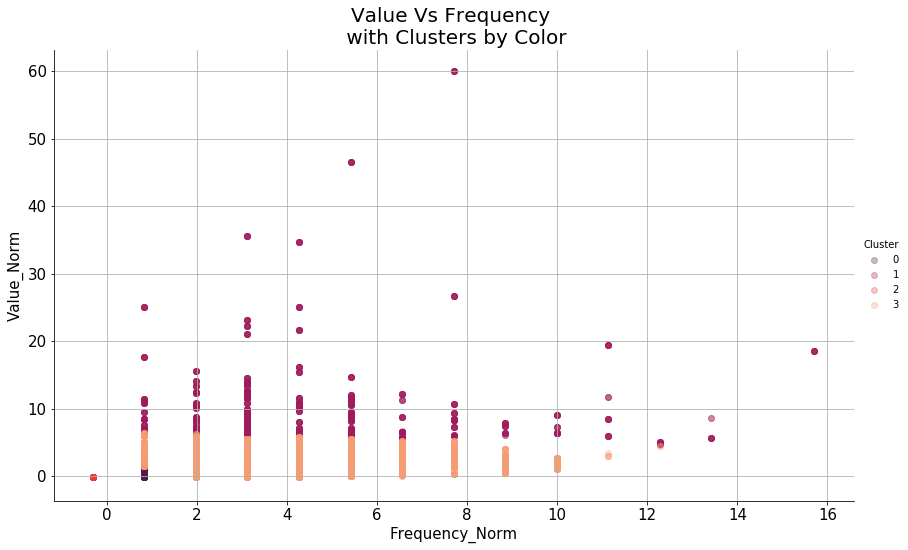

In [52]:
sns.lmplot(x = 'Frequency_Norm', y = 'Value_Norm', 
           data = final_df, 
           hue = "Cluster", 
           palette="rocket", 
           scatter_kws={'alpha':0.3},
           height=7, aspect=1.7, #This line controls the size of the plot
           fit_reg = False)

plt.xlabel('Frequency_Norm', fontsize = 15)
plt.ylabel('Value_Norm', fontsize = 15)
plt.title('Value Vs Frequency \n with Clusters by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)

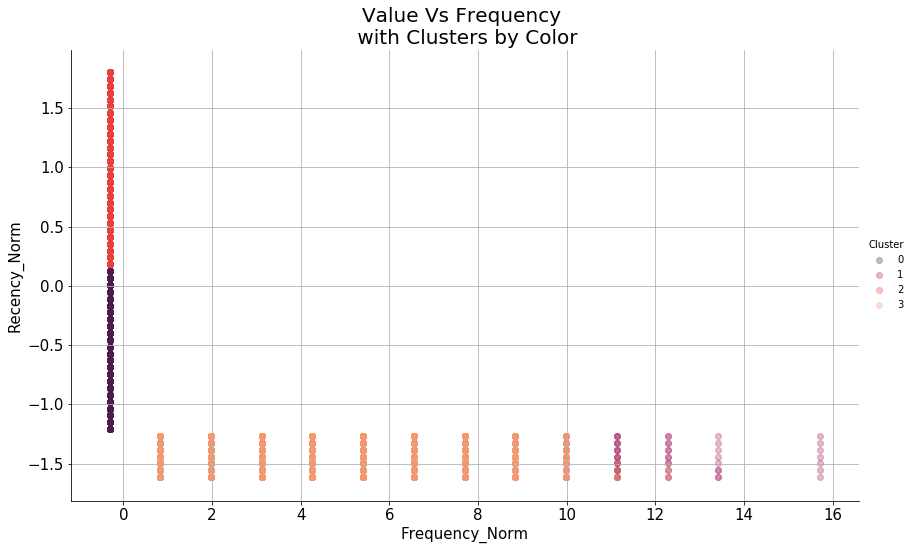

In [53]:
sns.lmplot(x = 'Frequency_Norm', y = 'Recency_Norm', 
           data = final_df, 
           hue = "Cluster", 
           palette="rocket", 
           scatter_kws={'alpha':0.3},
           height=7, aspect=1.7, #This line controls the size of the plot
           fit_reg = False)

plt.xlabel('Frequency_Norm', fontsize = 15)
plt.ylabel('Recency_Norm', fontsize = 15)
plt.title('Recency Vs Frequency \n with Clusters by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)

### 3D Scatter plot

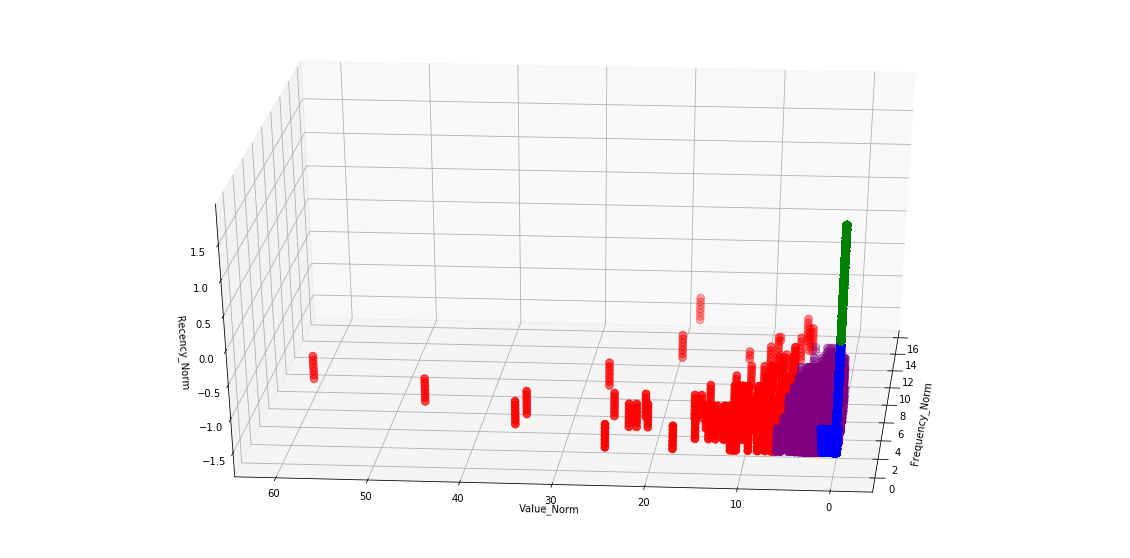

In [55]:
df = final_df
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Frequency_Norm[df.Cluster == 0], df["Value_Norm"][df.Cluster == 0], df["Recency_Norm"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Frequency_Norm[df.Cluster == 1], df["Value_Norm"][df.Cluster == 1], df["Recency_Norm"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Frequency_Norm[df.Cluster == 2], df["Value_Norm"][df.Cluster == 2], df["Recency_Norm"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Frequency_Norm[df.Cluster == 3], df["Value_Norm"][df.Cluster == 3], df["Recency_Norm"][df.Cluster == 3], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Frequency_Norm")
plt.ylabel("Value_Norm")
ax.set_zlabel('Recency_Norm')
plt.show()

# Summary/conclusions:

- From the data and based on the SSE curve it was decided to use a **K = 4** as it seems to be the best value to provide a better SSE and lower complexity.


- From the analysis it was possible to identify 4 probable distinct groups of customers.
    - (0) Low Freq, Low Recency, Low Value
    - (1) High Freq, Low Recency, Highest Value
    - (2) Low Freq, Medium Recency, Low Value
    - (3) High Freq, Low Recency, Medium Value
    
    

- From the results above the recommendation would be to send promotions to the Cluster (3) as it seems those customers would be the easiest to convert to active users buying products.


- Customers in Cluster (1) are the most engaged with the product and if needed a small incentive might help to keep them that way.


- Customers in Clusters (2) & (0) are not engaging at all, and it would be potentially the most expensive groups to bring back as an active customer (group 2 being the least engaged).
